<a href="https://colab.research.google.com/github/aneekbsws/deeplearning/blob/main/tf_mood_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops

Loading dataset for happy faces

In [11]:
def load_happy_faces():
  train_dataset = h5py.File("train_happy.h5","r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File("test_happy.h5","r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:])

  # print(train_set_y_orig.shape)
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [12]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_faces()
X_train = X_train_orig/255
X_test = X_test_orig/255

print(X_train.shape)
# print(Y_train_orig.shape)

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print(Y_train.shape)

(600, 64, 64, 3)
(600, 1)


Visualizing a random image

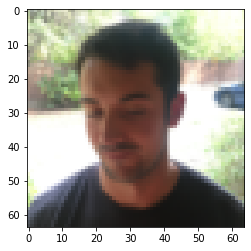

In [18]:
index = 179
plt.imshow(X_train[index])
plt.show()

Creating Sequential Model

In [21]:
def happyModel():
  model = tf.keras.Sequential([tf.keras.layers.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3), data_format="channels_last"),
                               tf.keras.layers.Conv2D(filters = 32, kernel_size=(7,7), strides=1, name="conv0"),
                               tf.keras.layers.BatchNormalization(axis=3, name="bn0"),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=1, activation="sigmoid", name="fc0")])
  return model

In [22]:
happy_model = happyModel()

In [24]:
happy_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [25]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0

In [26]:
happy_model.fit(X_train, Y_train, batch_size=16, epochs=10)

Epoch 1/10
38/38 [==============================] - 4s 94ms/step - loss: 1.3310 - accuracy: 0.7000
Epoch 2/10
38/38 [==============================] - 4s 93ms/step - loss: 0.2034 - accuracy: 0.9117
Epoch 3/10
38/38 [==============================] - 4s 94ms/step - loss: 0.1785 - accuracy: 0.9283
Epoch 4/10
38/38 [==============================] - 4s 93ms/step - loss: 0.1325 - accuracy: 0.9433
Epoch 5/10
38/38 [==============================] - 4s 93ms/step - loss: 0.0897 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 4s 94ms/step - loss: 0.1303 - accuracy: 0.9550
Epoch 7/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1965 - accuracy: 0.9267
Epoch 8/10
38/38 [==============================] - 4s 92ms/step - loss: 0.1221 - accuracy: 0.9633
Epoch 9/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1060 - accuracy: 0.9583
Epoch 10/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0679 - accuracy: 0.9783


In [28]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 46ms/step - loss: 0.3118 - accuracy: 0.8600


[0.31181204319000244, 0.8600000143051147]